In [ ]:
#Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

##Importing Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
bikerent_data=pd.read_csv('/content/BikeRentData.csv')
bikerent_data.shape

(17379, 15)

In [ ]:
bikerent_data=bikerent_data.drop_duplicates()
bikerent_data.shape

(17379, 15)

In [ ]:
bikerent_data.head()

,Unnamed: 0,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


#Exploratory Data Analysis

In [ ]:
bikerent_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17379 non-null  int64  
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.1 MB


So, there is no missing values corresponding to all features.

In [ ]:
bikerent_data.describe()

,Unnamed: 0,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,886.000000,977.000000


There is a possiblite of presence of outliers associated with 'cnt' feature.

In [ ]:
bikerent_data.nunique()

Unnamed: 0    17379
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
registered      776
cnt             869
dtype: int64

In [ ]:
bikerent_data=bikerent_data.drop('Unnamed: 0',axis=1)

Here I saw that the data consisted of index in previous, So I dropped the prev index as colab brings index with importing dataset.

In [ ]:
bikerent_data

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,108,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,81,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,83,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,48,61


In [ ]:
bikerent_data.corr()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
season,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.174226,0.178056
yr,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.253684,0.250495
mnth,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.122273,0.120638
hr,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.374141,0.394071
holiday,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,-0.047345,-0.030927
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.021578,0.026900
workingday,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,0.134326,0.030284
weathersit,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.120966,-0.142426
temp,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.335361,0.404772
atemp,0.319380,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.332559,0.400929


Here, I see corelatoin between temp and atemp is high, so I decide to merge those two columns.

And I convert all the yr and month into hours as all those features have very less impact on our target feature.

In [ ]:
bikerent_data['time']=(bikerent_data['yr']*365*24+bikerent_data['mnth']*30*24+bikerent_data['hr'])
bikerent_data['new_temp']=bikerent_data['temp']+bikerent_data['atemp']

In [ ]:
bikerent_data

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt,time,new_temp
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,13,16,720,0.5279
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,32,40,721,0.4927
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,27,32,722,0.4927
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,10,13,723,0.5279
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1,1,724,0.5279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,108,119,17419,0.5176
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,81,89,17420,0.5176
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,83,90,17421,0.5176
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,48,61,17422,0.5327


In [ ]:
bikerent_data=bikerent_data.drop(['yr','mnth','hr','temp','atemp'],axis=1)

In [ ]:
bikerent_data

,season,holiday,weekday,workingday,weathersit,hum,windspeed,registered,cnt,time,new_temp
0,1,0,6,0,1,0.81,0.0000,13,16,720,0.5279
1,1,0,6,0,1,0.80,0.0000,32,40,721,0.4927
2,1,0,6,0,1,0.80,0.0000,27,32,722,0.4927
3,1,0,6,0,1,0.75,0.0000,10,13,723,0.5279
4,1,0,6,0,1,0.75,0.0000,1,1,724,0.5279
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,1,1,2,0.60,0.1642,108,119,17419,0.5176
17375,1,0,1,1,2,0.60,0.1642,81,89,17420,0.5176
17376,1,0,1,1,1,0.60,0.1642,83,90,17421,0.5176
17377,1,0,1,1,1,0.56,0.1343,48,61,17422,0.5327


In [ ]:
# Outlier treatment of 'cnt' feature.
bikerent_data['cnt'][bikerent_data['cnt']<900].sort_values(ascending=False)

15133    899
15060    898
14124    897
14820    894
14220    893
        ... 
212        1
210        1
10201      1
8052       1
10896      1
Name: cnt, Length: 17358, dtype: int64

In [ ]:
# Replacing outliers with nearest logical value
bikerent_data['cnt'][bikerent_data['cnt']>900]=899

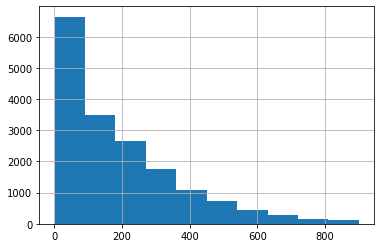

In [ ]:
bikerent_data['cnt'].hist()

In [ ]:
def PlotBarCharts(inpData,ColsToPlot):
    %matplotlib inline
    import matplotlib.pyplot as plt
    fig,subPlot=plt.subplots(nrows=1, ncols=len(ColsToPlot), figsize=(50,20))
    fig.suptitle('Bar Chart of' + str(ColsToPlot))
    for colName, plotNumber in zip(ColsToPlot,range(len(ColsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6162d7be10>,
      dtype=object)

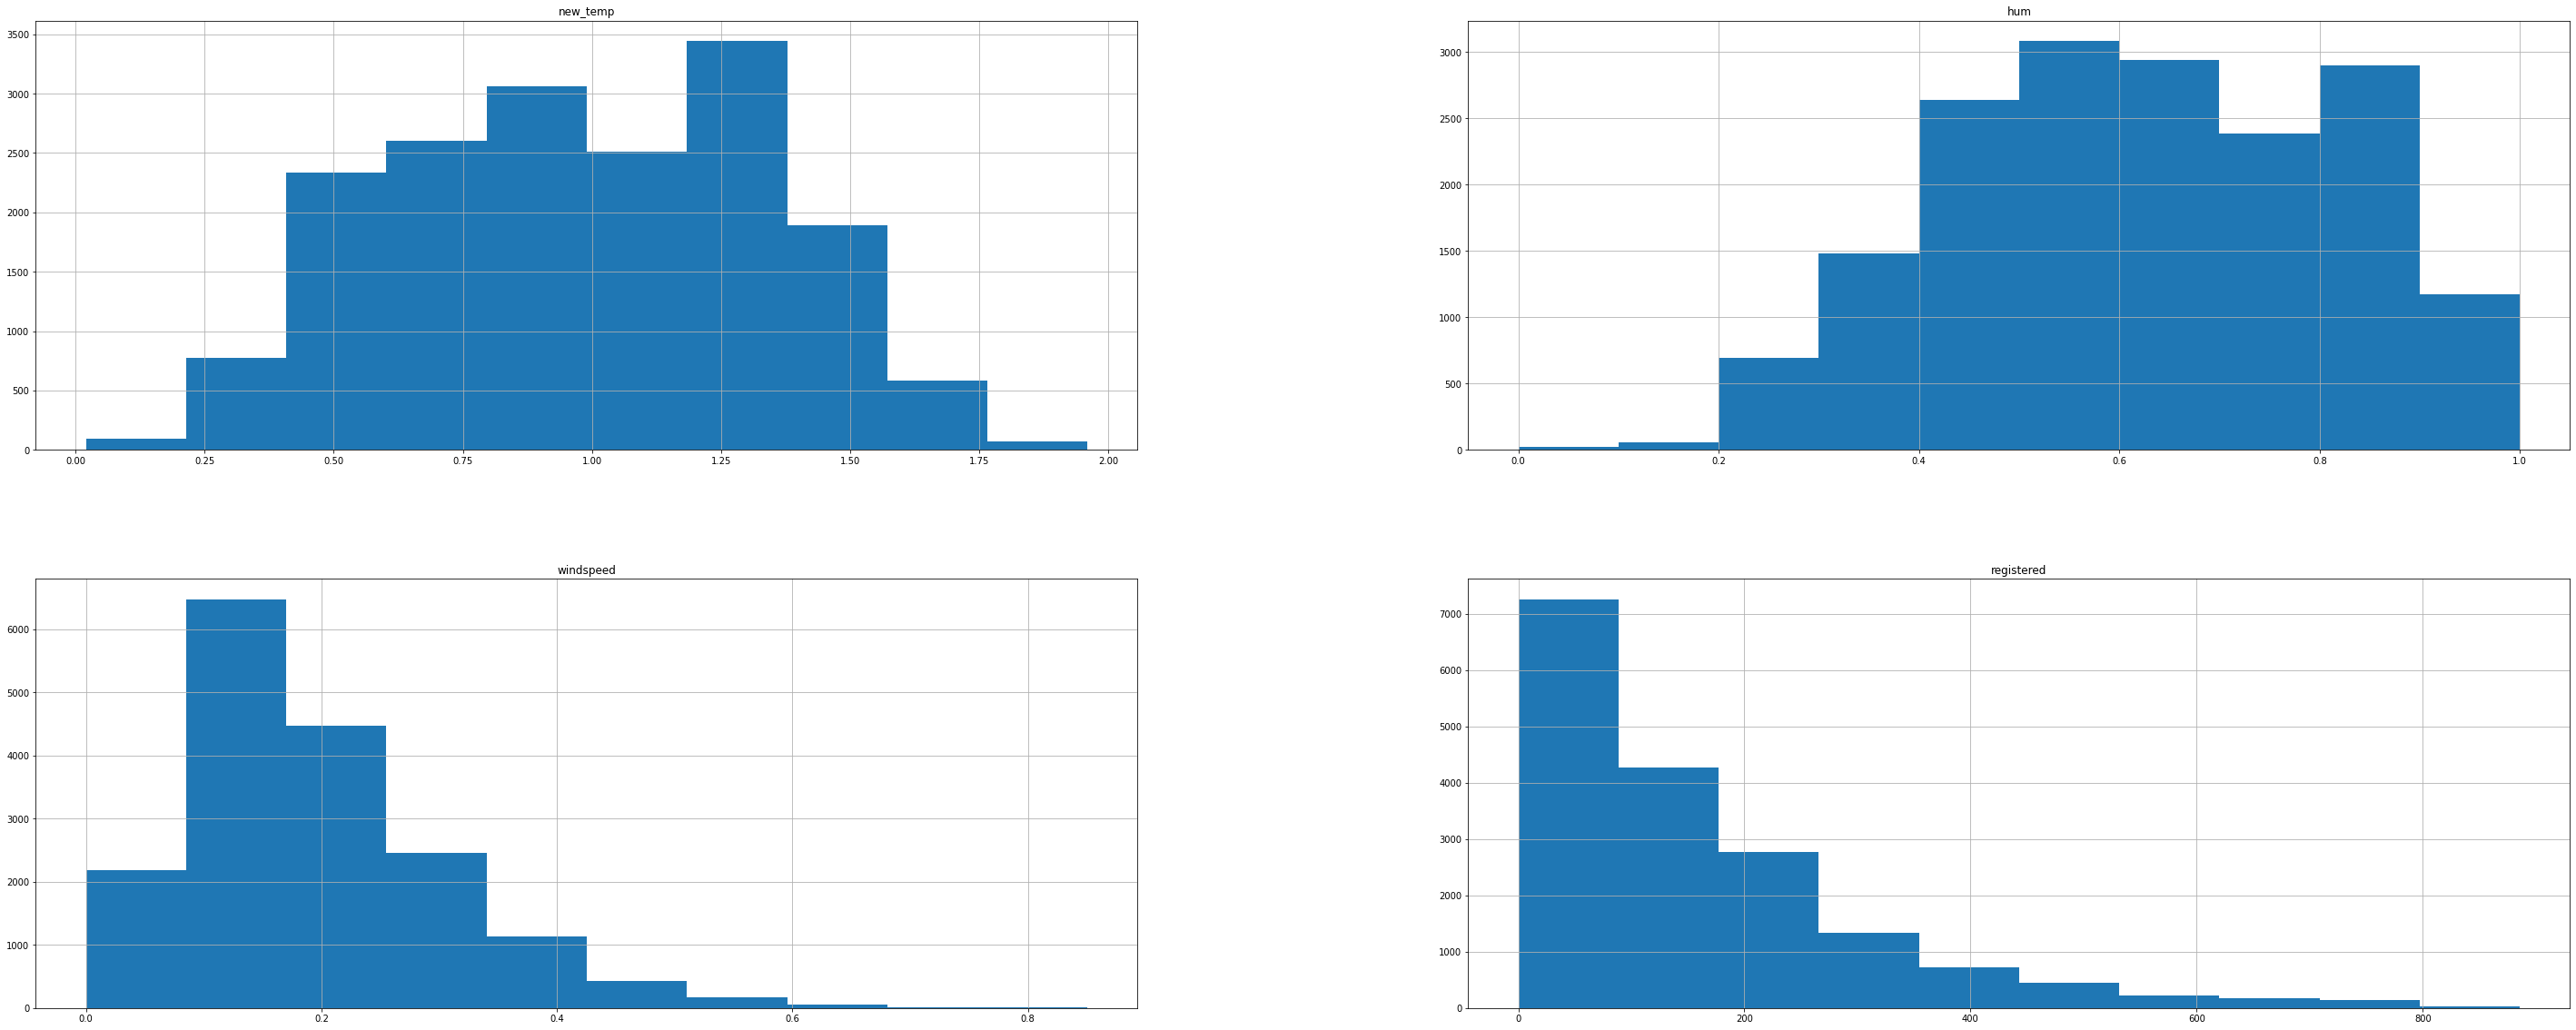

In [ ]:
bikerent_data.hist(['new_temp','hum','windspeed','registered'],figsize=(50,20))

In [ ]:
bikerent_data.isnull().sum()

season        0
holiday       0
weekday       0
workingday    0
weathersit    0
hum           0
windspeed     0
registered    0
cnt           0
time          0
new_temp      0
dtype: int64

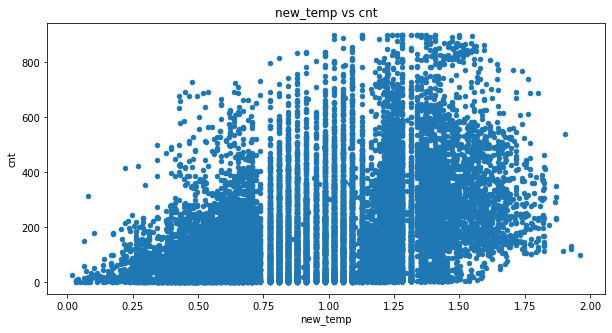

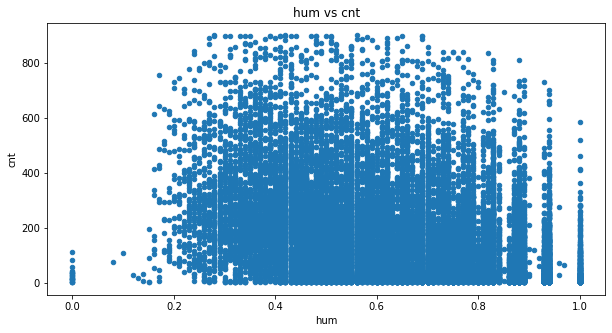

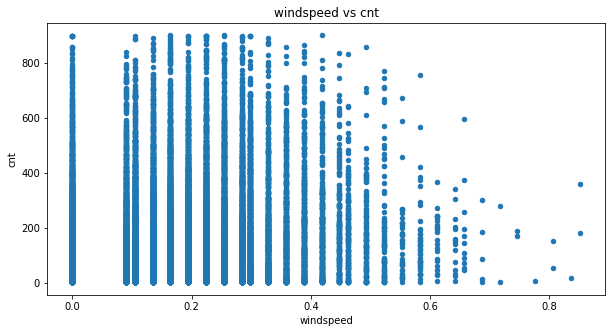

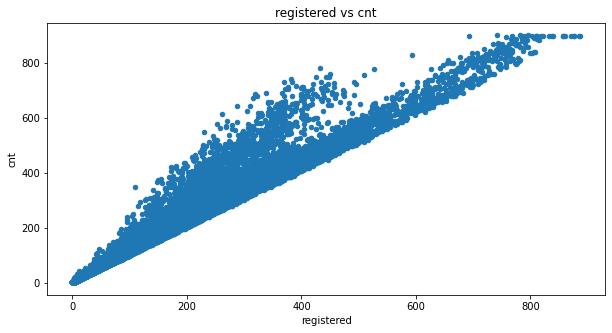

In [ ]:
ContinuousCols=['new_temp','hum','windspeed','registered']
for predictor in ContinuousCols:
    bikerent_data.plot.scatter(x=predictor,y='cnt',figsize=(10,5),title=predictor+" vs "+'cnt')

In [ ]:
ContinuousCols=['cnt','new_temp','hum','windspeed','registered']
CorrelationData=bikerent_data[ContinuousCols].corr()
CorrelationData

,cnt,new_temp,hum,windspeed,registered
cnt,1.000000,0.404403,-0.322973,0.093353,0.972001
new_temp,0.404403,1.000000,-0.061599,-0.041745,0.335070
hum,-0.322973,-0.061599,1.000000,-0.290105,-0.273933
windspeed,0.093353,-0.041745,-0.290105,1.000000,0.082321
registered,0.972001,0.335070,-0.273933,0.082321,1.000000


In [ ]:
CorrelationData['cnt'][abs(CorrelationData['cnt'])>0.3]

cnt           1.000000
new_temp      0.404403
hum          -0.322973
registered    0.972001
Name: cnt, dtype: float64

In [ ]:
#  Final Selected Continuous Columns:'temp','atemp','hum','registered'

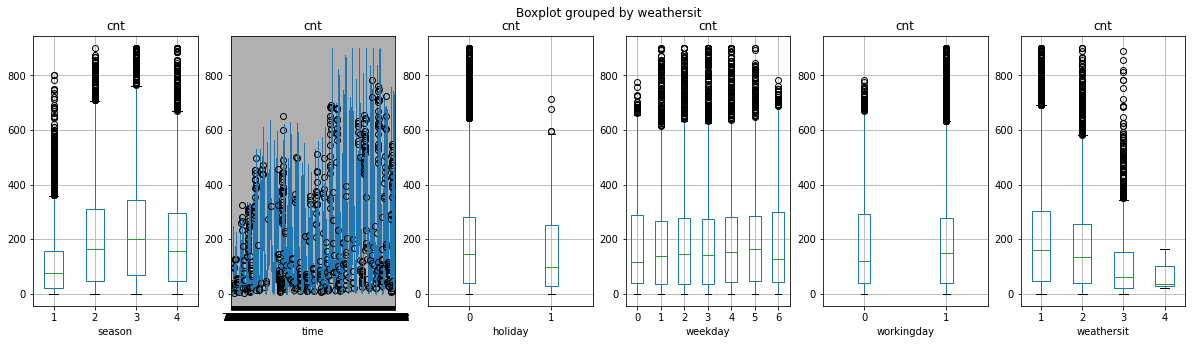

In [ ]:
CategoricalColList=['season','time','holiday','weekday','workingday','weathersit']
import matplotlib.pyplot as plt
fig,plotCanvas=plt.subplots(nrows=1,ncols=len(CategoricalColList),figsize=(20,5))
for predictorCol, i in zip(CategoricalColList,range(len(CategoricalColList))):
    bikerent_data.boxplot(column='cnt',by=predictorCol,figsize=(8,8),vert=True,ax=plotCanvas[i])

In [ ]:
#ANOVA TEST
def functionAnova(inpdata,TargetVariable,CategoricalPredictorList):
    from scipy.stats import f_oneway
    SelectedPredictors=[]
    print("####ANOVA Result####\n")
    for predictor in CategoricalPredictorList:
        CategoryGroupList=inpdata.groupby(predictor)[TargetVariable].apply(list)
        AnovaResult=f_oneway(*CategoryGroupList)
        
        if (AnovaResult[1]<0.05):
            print(predictor,'is correlated with',TargetVariable,'|P-Value',AnovaResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor,'is not correlated with',TargetVariable,'|P-Value',AnovaResult[1])
            
    return(SelectedPredictors)       
            

In [ ]:
CategoricalPredictorList=['season','time','holiday','weekday','workingday','weathersit']
functionAnova(inpdata=bikerent_data,TargetVariable='cnt',CategoricalPredictorList=CategoricalPredictorList)

####ANOVA Result####

season is correlated with cnt |P-Value 4.254883265966368e-257
time is correlated with cnt |P-Value 0.0
holiday is correlated with cnt |P-Value 4.5765731657506926e-05
weekday is correlated with cnt |P-Value 0.0019434636112632558
workingday is correlated with cnt |P-Value 7.060402847960155e-05
weathersit is correlated with cnt |P-Value 1.616527778796304e-81


['season', 'time', 'holiday', 'weekday', 'workingday', 'weathersit']

In [ ]:
#Final Selected Categorical Columns: ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']

In [ ]:
bikerent_data

,season,holiday,weekday,workingday,weathersit,hum,windspeed,registered,cnt,time,new_temp
0,1,0,6,0,1,0.81,0.0000,13,16,720,0.5279
1,1,0,6,0,1,0.80,0.0000,32,40,721,0.4927
2,1,0,6,0,1,0.80,0.0000,27,32,722,0.4927
3,1,0,6,0,1,0.75,0.0000,10,13,723,0.5279
4,1,0,6,0,1,0.75,0.0000,1,1,724,0.5279
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,1,1,2,0.60,0.1642,108,119,17419,0.5176
17375,1,0,1,1,2,0.60,0.1642,81,89,17420,0.5176
17376,1,0,1,1,1,0.60,0.1642,83,90,17421,0.5176
17377,1,0,1,1,1,0.56,0.1343,48,61,17422,0.5327


#Building Model

In [ ]:
X=bikerent_data.drop('cnt',axis=1)
y=bikerent_data['cnt']

In [ ]:
X

,season,holiday,weekday,workingday,weathersit,hum,windspeed,registered,time,new_temp
0,1,0,6,0,1,0.81,0.0000,13,720,0.5279
1,1,0,6,0,1,0.80,0.0000,32,721,0.4927
2,1,0,6,0,1,0.80,0.0000,27,722,0.4927
3,1,0,6,0,1,0.75,0.0000,10,723,0.5279
4,1,0,6,0,1,0.75,0.0000,1,724,0.5279
...,...,...,...,...,...,...,...,...,...,...
17374,1,0,1,1,2,0.60,0.1642,108,17419,0.5176
17375,1,0,1,1,2,0.60,0.1642,81,17420,0.5176
17376,1,0,1,1,1,0.60,0.1642,83,17421,0.5176
17377,1,0,1,1,1,0.56,0.1343,48,17422,0.5327


In [ ]:
bikerent_data['season'].nunique()

4

In [ ]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# splitting data in training set(70%) and test set(30%).
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() #create the object of the model
lr = lr.fit(x_train,y_train)

In [ ]:
from sklearn import metrics

accuracy = lr.score(x_train,y_train)
print('Training Accuracy is: ',(accuracy*100))

accuracy_test = lr.score(x_test,y_test)
print('Testing Accuracy is: ',(accuracy_test*100))

Training Accuracy is:  96.5914666508479
Testing Accuracy is:  96.50660424832662


##Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor() #create the object of the model
dtr=dtr.fit(x_train,y_train)

In [ ]:
accuracy = dtr.score(x_train,y_train)
print('Training Accuracy is: ',(accuracy*100))

accuracy_test = dtr.score(x_test,y_test)
print('Testing Accuracy is: ',(accuracy_test*100))

Training Accuracy is:  100.0
Testing Accuracy is:  97.80630514611272


in Decision Tree model Overfitting result can be observed here.

##Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
r = RandomForestRegressor() #create the object of the model
r=r.fit(x_train,y_train)

In [ ]:
accuracy = r.score(x_train,y_train)
print('Training Accuracy is: ',(accuracy*100))

accuracy_test = r.score(x_test,y_test)
print('Testing Accuracy is: ',(accuracy_test*100))

Training Accuracy is:  99.85032748974683
Testing Accuracy is:  98.83447522908695


##K-Neighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn=knn.fit(x_train,y_train)

accuracy = knn.score(x_train,y_train)
print('Training Accuracy is: ',(accuracy*100))

accuracy_test = knn.score(x_test,y_test)
print('Testing Accuracy is: ',(accuracy_test*100))

Training Accuracy is:  97.6562126867232
Testing Accuracy is:  96.29419771652206


##XGB Regressor

In [ ]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb=xgb.fit(x_train,y_train)

accuracy = knn.score(x_train,y_train)
print('Training Accuracy is: ',(accuracy*100))

accuracy_test = knn.score(x_test,y_test)
print('Testing Accuracy is: ',(accuracy_test*100))

[10:27:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Accuracy is:  97.6562126867232
Testing Accuracy is:  96.29419771652206


Among all the models, RF regressor gives the best accuracy 99%, So RF regresor model works best for this data  and should be chosen as the final model.